# Assignment 4 : Predict Blood Donations

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus. <br>
Data is courtesy of Yeh, I-Cheng via the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center).

The dataset contains the following variables:
* Months since Last Donation: this is the number of monthis since this donor's most recent donation.
* Number of Donations: this is the total number of donations that the donor has made.
* Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
* Months since First Donation: this is the number of months since the donor's first donation.

Your goal is to predict the last column, which is whether the donor donated blood in March 2007.

In [1]:
# import necessary libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

1-1 load the "transfusion.data" dataset into a dataframe variable called df. Print the shape, head of df

In [2]:
# your code here
df = pd.read_csv("transfusion.data")
print(df.shape)
print(df.head())

(748, 5)
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


1-2 Rename df columns to the following: `['Recency', 'Frequency', 'Volume', 'Time', 'Target']`, then print some info about df

In [3]:
# your code here
df.columns = ['Recency', 'Frequency', 'Volume', 'Time', 'Target']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency      748 non-null int64
Frequency    748 non-null int64
Volume       748 non-null int64
Time         748 non-null int64
Target       748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB
None


## Data Exploration

2- Plot a **bar plot** of the column **Target** (% of each class). How much accuracy can you get if prediction is always equal to "*0*" ?

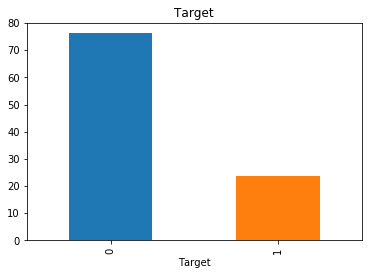

In [4]:
# your code here
(100 * df.groupby('Target').size()/df.shape[0]).plot(kind="bar", title="Target")

In [5]:
# your code here
print("If we we always predict 0, our accuracy would be : ", 100 * df.groupby('Target').size().get(0)/df.shape[0], "%")

If we we always predict 0, our accuracy would be :  76.20320855614973 %


3-1 Print the [Correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices) of df.

            Recency  Frequency    Volume      Time    Target
Recency    1.000000  -0.182745 -0.182745  0.160618 -0.279869
Frequency -0.182745   1.000000  1.000000  0.634940  0.218633
Volume    -0.182745   1.000000  1.000000  0.634940  0.218633
Time       0.160618   0.634940  0.634940  1.000000 -0.035854
Target    -0.279869   0.218633  0.218633 -0.035854  1.000000


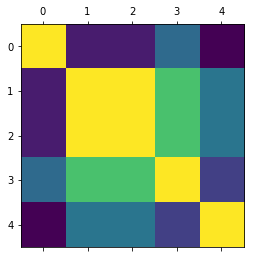

In [6]:
# your code here
plt.matshow(df.corr())
print(df.corr())

3-2 Which are the 2 most correlated variables, make a scatter plot of them. Could you guess how much blood is donated each time ?

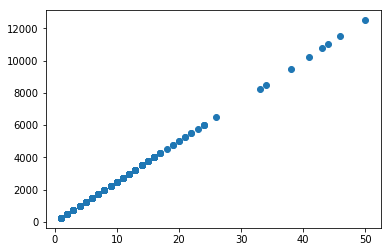

In [7]:
# your code here
plt.scatter(df["Frequency"], df["Volume"])

The most correlated columns are volume and frequency

3-3 Remove one of the two most correlated variables above. The choice should have no consequence for the rest, but to have the same results among all students, remove the column with the shortest name (small number of letters)

In [8]:
# your code here
df = df.drop(["Volume"], axis=1)

## Model Training & Evaluation

4- Load the target variable into a dataframe and call it y. Then, load the features into a second dataframe and call it X. Fit a logistic model using cross validation. Use 5 folds and print the average accuracy

In [9]:
# your code here
y = pd.DataFrame(df["Target"])
X = df.drop(["Target"], axis=1)

In [10]:
# your code here
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=666)

# your code here
scores_log = cross_val_score(clf_log, X, y, scoring='accuracy', cv=5)
print('cross validation r2 = ', scores_log.mean())

cross validation r2 =  0.7794541387024608


5- Fit a RandomForestClassifier [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) using cross validation. Use 5 folds and print the average accuracy. <br>
Set random_state=1 and play around the other parameters manually to improve the score

In [11]:
# your code here
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=666)# your code here
scores_rf = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=5)# your code here
print('cross validation accuracy = ', scores_rf.mean())

cross validation accuracy =  0.6792662192393737


6- So far, you were told to leave all the parameters to default values, let's now optimize some of them using GridSearchCV. <br>
Search the following parameters in the given values (**This may take a while**):
* min_samples_leaf: [1, 4, 7]
* min_samples_split: [2, 4, 6, 8, 10]
* n_estimators: [20, 30, 40]
* max_depth: [2,3]

In [12]:
# your code here
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':list(range(1, 8, 3)),'min_samples_split':list(range(2, 11, 2)),
          'n_estimators':list(range(20, 50,10)), 'max_depth': [2, 3]}
clf_rf2 = RandomForestClassifier(random_state=666)
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=666, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [1, 4, 7], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [20, 30, 40], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

7- Print the best score, and the best parameters

In [13]:
# your code here
print(clf_gs.best_score_)

0.7727272727272727


In [14]:
# your code here
print(clf_gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 40}


8- Build a dataframe containing the importance of each feature. Sort it from the most important to the least one.

In [15]:
# your code here
clf_rf2 = clf_gs.best_estimator_
feature_importance = pd.DataFrame(clf_rf2.feature_importances_, index=X.columns, columns=["Importance"])
feature_importance.sort_values("Importance", ascending=False)
print(feature_importance)

           Importance
Recency      0.468287
Frequency    0.358830
Time         0.172883


9- **Feature engineering**: Try to improve the *RandomForestClassifier* by adding engineered features and using 5 fold grid search for parameter tuning. Print the best score and the best parameters.   
**Hint**: You can achieve 78,6 % accuracy or higher.

In [17]:
# Feature engineering :
X['Rate'] = X['Frequency']/X['Time']

clf_rf2 = RandomForestClassifier(random_state=1, n_jobs=3)
clf_gs = GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(X, y)
# your code here
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.786096256684492
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


10- Always in the same setting (5 fold grid search), try different ensemble models from [sklearn](http://scikit-learn.org/stable/modules/ensemble.html#ensemble) in order to get the highest accuracy. Print the best score

In [33]:
# your code here
from sklearn.neighbors import KNeighborsClassifier

network = KNeighborsClassifier()

params_2 = {'n_neighbors': np.arange(1, 40)}

grid_search = GridSearchCV(network, params_2, cv=5)

grid_search.fit(X, y)
#save best model
best = grid_search.best_estimator_
#check best n_neigbors value
print(grid_search.best_params_)
print("Best score (knn): ", grid_search.score(X,y))

{'n_neighbors': 36}
Best score (knn):  0.7887700534759359


/home/korax/.anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
